In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [11]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [13]:
df['Salary'] = df['Salary'].astype(int)

In [14]:
df

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


<Axes: xlabel='YearsExperience', ylabel='Salary'>

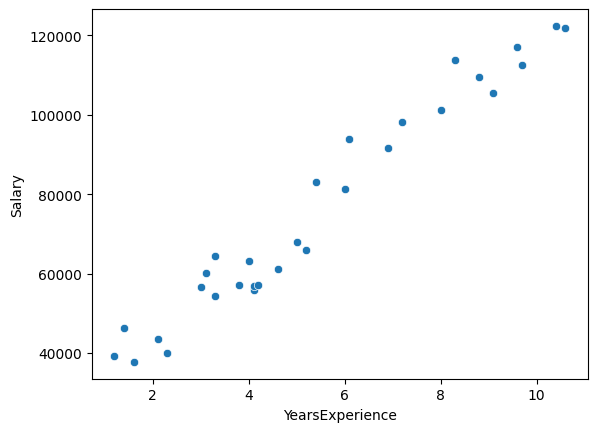

In [15]:
import seaborn as sns
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [16]:
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y = df['Salary'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model= LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 49830096.855908394
Root Mean Squared Error: 7059.04362190151
R² Score: 0.9024461774180497


In [26]:
import joblib
joblib.dump(model, "salary_model.pkl")
print("✅ Model saved as salary_model.pkl")

✅ Model saved as salary_model.pkl
